<a href="https://colab.research.google.com/github/porgill-prosper/airflow/blob/master/Deep%20Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Perceptron</h1>

PyTorch


In [0]:
#!pip3 install torch

In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [0]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=.1, factor=.2)
#print(x,y)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))

In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

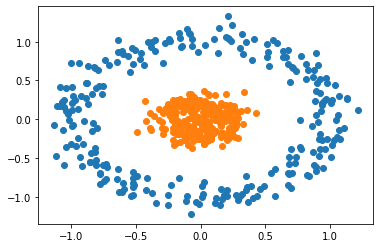

In [24]:
scatter_plot()

In [0]:
class Model(nn.Module):
  def __init__(self, input_sise, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_sise, H1)
    self.linear2 = nn.Linear(H1, output_size)
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0
    

In [26]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [28]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch: ", i, "Loss: ", loss.item())

  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch:  0 Loss:  0.7148522138595581
epoch:  1 Loss:  0.6947320699691772
epoch:  2 Loss:  0.6955163478851318
epoch:  3 Loss:  0.7014891505241394
epoch:  4 Loss:  0.7013985514640808
epoch:  5 Loss:  0.6974702477455139
epoch:  6 Loss:  0.6939254403114319
epoch:  7 Loss:  0.6928594708442688
epoch:  8 Loss:  0.6939384937286377
epoch:  9 Loss:  0.6954389810562134
epoch:  10 Loss:  0.6958749294281006
epoch:  11 Loss:  0.6949177384376526
epoch:  12 Loss:  0.6931487321853638
epoch:  13 Loss:  0.6913900375366211
epoch:  14 Loss:  0.6901611089706421
epoch:  15 Loss:  0.6894587874412537
epoch:  16 Loss:  0.6888436079025269
epoch:  17 Loss:  0.6877667307853699
epoch:  18 Loss:  0.685900866985321
epoch:  19 Loss:  0.6832477450370789
epoch:  20 Loss:  0.6800417304039001
epoch:  21 Loss:  0.6765585541725159
epoch:  22 Loss:  0.6729682087898254
epoch:  23 Loss:  0.6692693829536438
epoch:  24 Loss:  0.6653285026550293
epoch:  25 Loss:  0.6609663963317871
epoch:  26 Loss:  0.6560587882995605
epoch:  27 L

Text(0, 0.5, 'loss')

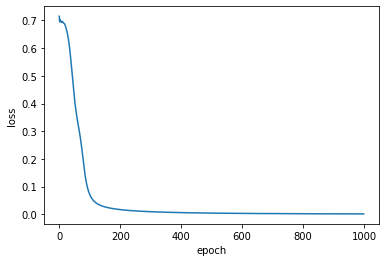

In [10]:
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('loss')

In [0]:
  def plot_decision_boundary(X, y):
    x_span = np.linspace(min(X[:, 0]) -.25, max(X[:, 0] +.25))
    y_span = np.linspace(min(X[:, 1]) -.25, max(X[:, 1] +.25))
    xx, yy = np.meshgrid(x_span, y_span)
    #print(xx, '\n')
    #print(yy)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z)



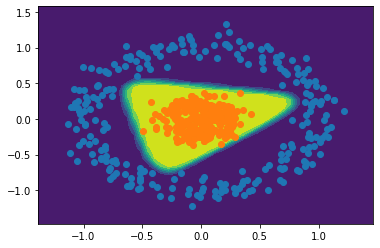

In [30]:
plot_decision_boundary(X, y)
scatter_plot()

Prediction is:  1


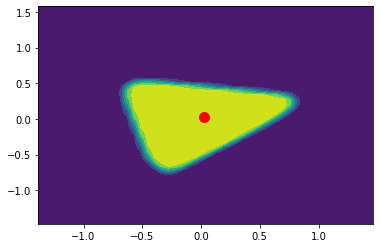

In [31]:
x = .025
y = .025
point = torch.Tensor([x,y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print("Prediction is: ", prediction)
plot_decision_boundary(X, y)